In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [30]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [32]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Exploratory Summary

1. We have a dataframe consisting of 9827 rows and 9 columns.
2. Our dataset looks a bit tidy with no NaNs nor duplicated values
3. Release Date column needs to be casted into date time and to extract only the year value
4. Overview and Poster-Url wouldn't be so useful during analysis, so we'll drop them.
5. There are noticable outliers in Popularity column
6. Vote_Average better be categorised for proper analysis.
7. Genre column has coma separated values and white spaces that needs to be handled and casted into category. 

In [35]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [36]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [37]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [38]:
df.rename(columns = {'Release_Date': 'Release_Year'}, inplace = True)
df.head()

,Release_Year,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Dropping unnecessary columns

In [39]:
cols = ['Overview', 'Poster_Url']
df.drop(cols, axis = 1, inplace = True)

In [40]:
df.columns

Index(['Release_Year', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre'],
      dtype='object')

In [41]:
df.head()

,Release_Year,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,en,Thriller
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


# Categorizing Vote_Average column

We would cut the Vote_Average values and make 4 categories : Popular, Average, Below_Average, Not_Popular to 
descibe it more using categorize_col() function

In [42]:
def categorize_col(df, col, labels):

    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [43]:
labels = ['Not_Popular', 'Below_Average', 'Average', 'Popular']
categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['Popular', 'Below_Average', 'Average', 'Not_Popular', NaN]
Categories (4, object): ['Not_Popular' < 'Below_Average' < 'Average' < 'Popular']

In [44]:
df.head()

,Release_Year,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Average,en,Thriller
3,2021,Encanto,2402.201,5076,Popular,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,en,"Action, Adventure, Thriller, War"


In [45]:
df['Vote_Average'].value_counts()

Vote_Average
Not_Popular      2467
Popular          2450
Average          2412
Below_Average    2398
Name: count, dtype: int64

In [46]:
df.dropna(inplace=True)
df.isna().sum()

Release_Year         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64

# Processing Genre column 

We'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [47]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Year,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,en,Crime
4,2022,The Batman,3827.658,1151,Popular,en,Mystery


In [48]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Year       25552 non-null  int32   
 1   Title              25552 non-null  object  
 2   Popularity         25552 non-null  float64 
 3   Vote_Count         25552 non-null  int64   
 4   Vote_Average       25552 non-null  category
 5   Original_Language  25552 non-null  object  
 6   Genre              25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(2)
memory usage: 949.2+ KB


In [50]:
df.nunique()

Release_Year          100
Title                9415
Popularity           8088
Vote_Count           3265
Vote_Average            4
Original_Language      42
Genre                  19
dtype: int64

In [51]:
df.head()

,Release_Year,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,en,Crime
4,2022,The Batman,3827.658,1151,Popular,en,Mystery


# Data Visualization

In [61]:
sns.set_style('whitegrid')

# What is the most frequent genre of movies released on Netflix

In [62]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

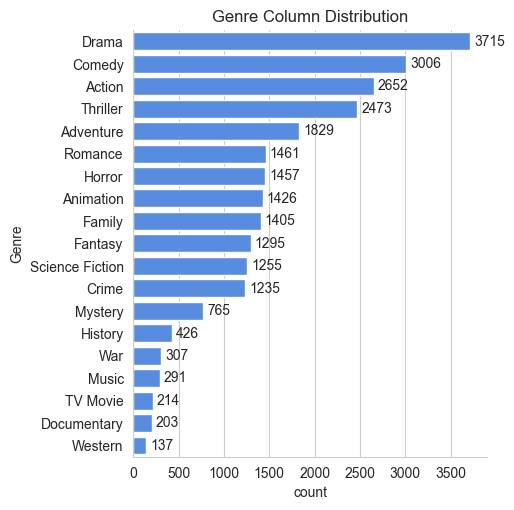

In [63]:
ax = sns.catplot(y = 'Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index, color = '#4287f5')
for container in ax.ax.containers:
    ax.ax.bar_label(container, fmt='%d', label_type='edge', padding=3)  # Add labels
plt.title('Genre Column Distribution')
plt.show()

# Which has the highest votes in vote Average column

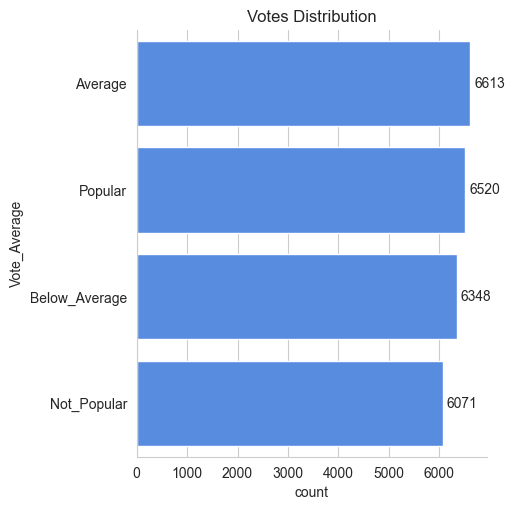

In [66]:
ax = sns.catplot(y = 'Vote_Average', data=df, kind = 'count', order = df['Vote_Average'].value_counts().index, color = '#4287f5')
for container in ax.ax.containers:
    ax.ax.bar_label(container, fmt='%d', label_type='edge', padding=3) 
plt.title('Votes Distribution')
plt.show()

# What movie got the highest popularity and what's its genre

In [67]:
df.head(2)

,Release_Year,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Adventure


In [68]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Year,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Science Fiction


# What movie got the lowest popularity and what's its genre

In [69]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Year,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,en,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,en,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,en,History
25549,1984,Threads,13.354,186,Popular,en,War
25550,1984,Threads,13.354,186,Popular,en,Drama
25551,1984,Threads,13.354,186,Popular,en,Science Fiction


# Which year has the most filmmed movies

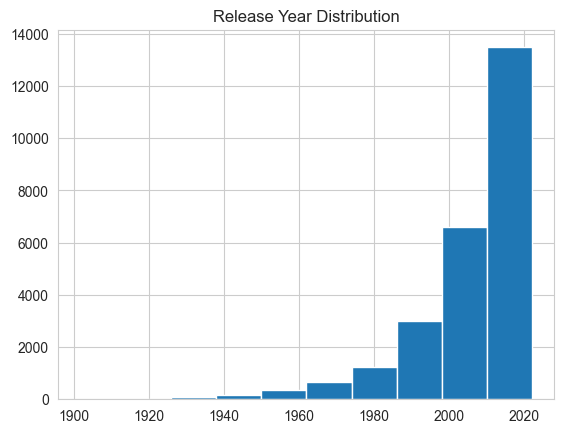

In [70]:
df['Release_Year'].hist()
plt.title('Release Year Distribution')
plt.show()

# Conclusion

1. Drama Genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

2. We have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities 

3. Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Science Fiction.

4. The United_states, thread has the highest lowest rate in this dataset and it has genres of music, drama, war, sci-fi and history

5. The year 2020 has the highest filmming rate in this dataset